# 역전파(할건데 3차원 먼저 하나봄?)
- fully connect : 맨 마지막에 예측 (CNN, RNN:내부에서 for문)

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
dir(datasets) #그냥 데이터 확인해서 원하는거 고를거임

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [3]:
datasets.load_wine() #데이터 고름

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

## 데이터를 8:2=train:test로 나눠서 3layer 만들기

### 1. Activation function

In [4]:
## 1. Activation function
#sigmoid
#softmax
#relu

## 2. Loss function
#mse
#cross_entropy_error

## 3.differ fuction 미분함수
#numerical_gradient: 만드는이유//수치미분을 위함(돌아가는 원리 알기 위해) >> 나중에 해석적 미분을 하려고, (fxh - fx)/h

## 4. Layer 만들기 : 지금은 One 1차원으로 만들거임

In [5]:
#함수 만드는가봄

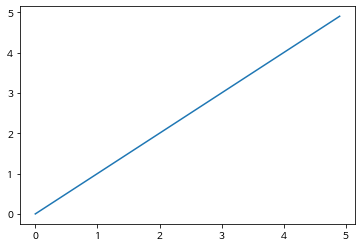

In [6]:
#이 두개는 sum없으니 행렬shape그대로 나와야함

def sigmoid(x): 
    return 1/(1+np.exp(-x))

def relu(x):
    return np.where(x<=0,0,x)

import matplotlib.pyplot as plt
plt.plot(relu(np.arange(-5,5,0.1)),relu(np.arange(-5,5,0.1)))

In [7]:
# def relu(x):
#     return np.maximum(0,x)

# relu(0)
# relu(10)
# relu(3)

In [8]:
#원핫의 모양대로 나와야함
#sum이라 한 값이 나옴

def softmax(x): #원래 행렬의 모양대로 출력시키기 위해 한값(소프트맥스)만 곱함
    x = x - np.max(x,axis=1).reshape(-1,1)
    return np.exp(x)/np.sum(np.exp(x),axis=1).reshape(-1,1)

In [9]:
(np.arange(8).reshape(4,2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [10]:
#를 확률값으로 만들어야

In [11]:
np.exp(np.arange(8).reshape(4,2))

array([[1.00000000e+00, 2.71828183e+00],
       [7.38905610e+00, 2.00855369e+01],
       [5.45981500e+01, 1.48413159e+02],
       [4.03428793e+02, 1.09663316e+03]])

In [12]:
#각 열에서의 sum을 구해서 나눠줘야하니 여기선 4개값이 나오겠지

In [13]:
x = (np.arange(8).reshape(4,2))
delta = 1e-7
np.exp(x)/np.sum(np.exp(x+delta),axis=1).reshape(-1,1)

array([[0.26894139, 0.73105851],
       [0.26894139, 0.73105851],
       [0.26894139, 0.73105851],
       [0.26894139, 0.73105851]])

In [14]:
np.exp(1)
np.exp(0)
np.exp(-1)
np.exp(-1000)
3/np.exp(-100000) #그래서 delta추가

C:\Users\user\AppData\Local\Temp/ipykernel_11936/2158699086.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  3/np.exp(-100000) #그래서 delta추가


inf

In [15]:
x - np.max(x,axis=1) #max는 행렬 한 줄의 가장 큰 값 뽑아냄 

ValueError: operands could not be broadcast together with shapes (4,2) (4,) 

### 2. Loss function

In [16]:
#2 Loss Function
def cross_entropy_error(y,t):
    delta = 1e-5
    return -np.sum(t*np.log(y+delta))/y.shape[0]

In [17]:
#x는 2차원이라 생각하고
x = np.random.randint(1,10,8).reshape(4,2)
x[0,0] = 3 #0,0자리에 3으로 대체하겠다


#3 differ function
def numerical_gradient(f,x): #각자리의 값을 미분해줘야하니 for문 돌리자
    h = 1e-4 #아주작은 값을 빼줄거얍
    grad = np.zeros_like(x)
    if x.ndim == 2:
        for i in range(x.shape[0]):
            for j in range(x.shape[1]): #2차원이니깐 이렇게
                fx = f(x[i,j]) #함수식 하나 만들기
                tmp_val = x[i,j] #x에 i,j 행렬값을 집어넣는다
                x[i,j] = tmp_val + h #작은 값을 더해서 증가시킨다
                fxh = f(x[i,j]) #변화된 함수식
                grad[i,j] = (fxh - fx)/h # i,j행렬 값의 미분값을 구함
                x[i,j] = tmp_val #위를 받아서 다시 돌릴거
    else: #b값 때문에 
        for i in range(x.size):
            fx = f(x[i])
            tmp_val = x[i]
            x[i] = tmp_val + h
            fxh = f(x[i])
            grad[i] = (fxh - fx)/h
            x[i] = tmp_val
    return grad

In [18]:
X = datasets.load_wine()['data']
X.shape

(178, 13)

In [19]:
y = datasets.load_wine()['target']
y.shape

(178,)

In [20]:
t = np.zeros((y.size,np.unique(y).size))
t.shape

(178, 3)

In [21]:
for i in range(t.shape[0]): #178개 돌아감
    t[i,y[i]] = 1

In [22]:
def predict(x,w):
    return softmax(np.dot(x,w))

In [23]:
w = np.random.randn(13,3)
pred = predict(X,w) #이렇게 예측하면 잘안됨 그래서softmax

In [24]:
softmax(pred)

array([[0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.57611688, 0.21194156, 0.21194156],
       [0.

In [25]:
f = lambda W: cross_entropy_error(pred,t)

In [26]:
#미분한 W값
numerical_gradient(f,w)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [27]:
# 계속 w업데이트
lr = 1e-3
dW = numerical_gradient(f,w)
w = w - lr*dW 

In [28]:
##이제 묶어서 클래스 만들거임:: 나중에 nework끼리 경쟁하는거가 있어서 하는거임

#1 network 설계
#2 predict = X*network
#3 predict result vs true value 오차함수 생성
#4 함수를 미분
#5 미분값을 lr와 곱해서 빼준후 update

class OneLayer:
    def __init__(self,input_size,output_size):
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,output_size)
        self.W['b'] = np.random.randn(output_size)
        
    def predict(self,x):
        w1,b = self.W['W1'],self.W['b']
        pred = softmax(np.dot(x,W1) + b)
        return pred
    
    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    def numerical_gradient(self,x,t):
        y = self.predict(x)
        f = lambda W: cross_entropy_error(y,t)
        grad = {}
        grad['W1'] = numerical_gradient(f,self.W['W1'])
        grad['b'] = numerical_gradient(f,self.W['b'])
        
        return grad
    
    def accuracy(self,x,t):
        y = self.predict(x) #x를가지고 y를 예측
        acc = np.sum(np.argmax(y,axis=1) == np.argmax(t,axis=1))/y.shape[0]
        return acc
    
    def fit(self,x,t,epochs=1000,lr=1e-3,verbos=1): #verbos=1: 한줄로 학습결과 보여줌
        for epoch in range(epochs):
            self.W['W1'] = self.W['W1'] - lr*self.numerical_gradient(x,t)['W1']
            self.W['b'] -= lr*self.numerical_gradient(x,t)['b']
            if verbos == 1:
                print("=========== loss ",self.loss(x,t), "======== acc ",self.accuracy(x,t))
                

In [29]:
#확인
X.shape
t.shape
#값주기
input_size = X.shape[1]
output_size = t.shape[1]
#모델생성
model = OneLayer(input_size=input_size, output_size=output_size)

In [30]:
#확인
model.W['W1'].shape
model.W['W1']

array([[ 0.18288475,  0.69007937, -1.6242587 ],
       [-0.03376915,  1.18163281,  0.39970785],
       [ 0.76031125, -0.16993336,  1.25258499],
       [ 0.82807409, -0.77707652, -2.96479434],
       [ 0.50378222, -2.07176777,  1.19342965],
       [ 1.80861954, -0.42242125, -0.97363745],
       [ 0.18413828, -0.96929613,  0.41595149],
       [-0.98688024, -1.39754922,  1.50504256],
       [ 1.48168107,  1.2912138 , -0.57199798],
       [ 0.1549915 , -0.07754445, -1.12988335],
       [ 1.41442526,  0.29676508,  0.77911924],
       [ 1.14223235,  1.04393931, -1.25892969],
       [ 1.990007  ,  1.29655838,  1.49168867]])

In [31]:
numerical_gradient(f,model.W['W1'])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [32]:
lambda W: cross_entropy_error(X,t)

<function __main__.<lambda>(W)>

In [38]:
model.numerical_gradient(X,t)

NameError: name 'W1' is not defined

In [39]:
model.fit(X,t,verbos=2)

NameError: name 'W1' is not defined